In [7]:
# Import pandas for loading and handling the dataset
import pandas as pd  
# Import numpy for numerical operations
import numpy as np 

In [9]:
# Load the Amazon reviews dataset
df = pd.read_csv("Reviews.csv")

# Display first 5 rows to understand data structure
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment_label
0,28389,B007OXJMD2,A1YNN51RNUCCUA,Jennilee R. Benda,0,0,2,1342915200,"It's okay, but not really worth buying.",I had some of this in a sampler pack. It real...,negative
1,36700,B004CLCEDE,A2YWQAFCHIO779,VR33,2,2,4,1312761600,"Great product, but kind of pricey",This is great because it doesn't have any calo...,positive
2,38719,B002DHUCEM,A1FDVT0DLJWV78,D. A. J.,6,7,4,1255651200,Great for a chocolate boost,I really like this product. I have been trying...,positive
3,16808,B001LGGH40,A15IH0ZQ87H51P,"S. Shrader ""Bio Gal""",1,1,1,1237420800,Did not like the taste of this,My guess is the other flavors of Switch taste ...,negative
4,33586,B006N3I84I,A3HPHQ9F2CCF06,"J. Taylor ""Nana""",0,0,4,1310688000,Good Coffee,I actually came to this coffee because Amazon ...,positive


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17181 entries, 0 to 17180
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      17181 non-null  int64 
 1   ProductId               17181 non-null  object
 2   UserId                  17181 non-null  object
 3   ProfileName             17179 non-null  object
 4   HelpfulnessNumerator    17181 non-null  int64 
 5   HelpfulnessDenominator  17181 non-null  int64 
 6   Score                   17181 non-null  int64 
 7   Time                    17181 non-null  int64 
 8   Summary                 17179 non-null  object
 9   Text                    17181 non-null  object
 10  sentiment_label         17181 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.4+ MB


In [13]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,17181.000000,17181.000000,17181.000000,17181.000000,1.718100e+04
mean,24001.948082,1.714045,2.502241,3.376113,1.297220e+09
std,13860.141847,4.992673,5.980299,1.749897,4.602045e+07
min,1.000000,0.000000,0.000000,1.000000,1.067558e+09
25%,11852.000000,0.000000,0.000000,1.000000,1.273968e+09
50%,24197.000000,0.000000,1.000000,4.000000,1.311120e+09
75%,36047.000000,2.000000,3.000000,5.000000,1.331597e+09
max,47917.000000,203.000000,212.000000,5.000000,1.351210e+09


In [15]:
df['Score'].value_counts()

Score
5    8131
1    4488
2    2693
4    1869
Name: count, dtype: int64

In [17]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               2
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   2
Text                      0
sentiment_label           0
dtype: int64

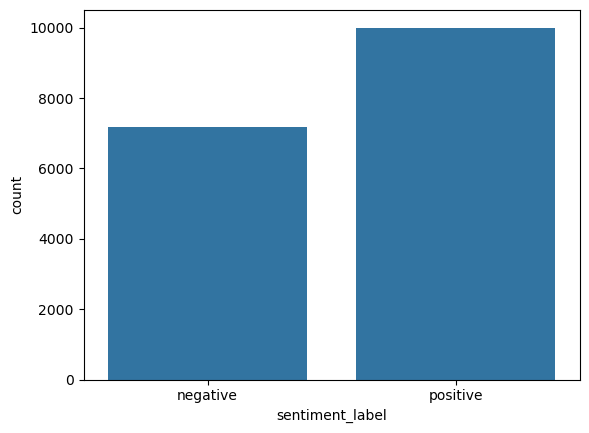

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment_label', data=df)
plt.show()

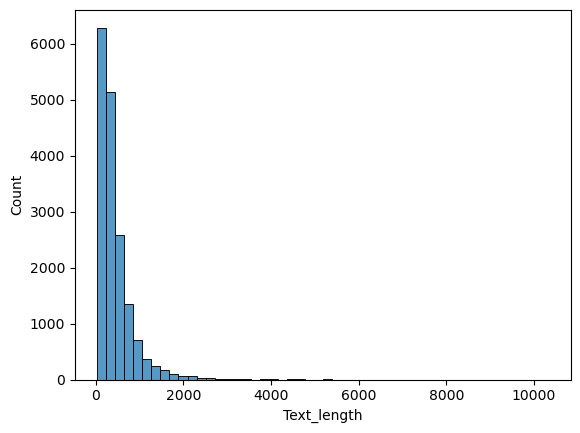

In [21]:
df['Text_length'] = df['Text'].apply(len)
sns.histplot(df['Text_length'], bins=50)
plt.show()

<Axes: xlabel='sentiment_label', ylabel='Text_length'>

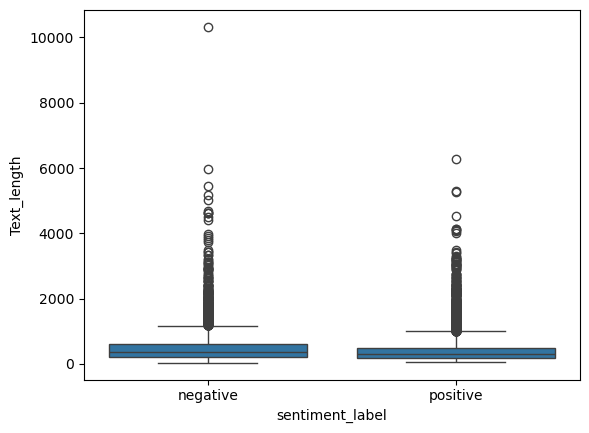

In [23]:
sns.boxplot(x='sentiment_label', y='Text_length', data=df)

In [25]:
df.shape[0]

17181

In [27]:
df.duplicated(subset='Text').sum()

765

In [29]:
df = df.drop_duplicates(subset='Text')

In [31]:
df.shape[0]

16416

In [33]:
# Select only the required columns for sentiment analysis
df = df[['Text', 'Score']]

# Check for missing values
df.isnull().sum()

Text     0
Score    0
dtype: int64

In [35]:
# Convert star ratings into sentiment labels
# Rating >= 4 → Positive (1), Rating <= 2 → Negative (0)
df = df[df['Score'] != 3]  # Remove neutral reviews

df['Sentiment'] = df['Score'].apply(lambda x: 1 if x >= 4 else 0)

In [37]:
# Import re for regular expressions (used in text cleaning)
import re  

# Import Natural Language Toolkit for stopwords and lemmatization
import nltk  

# Download stopwords (run once)
nltk.download('stopwords')
nltk.download('wordnet')

# Import stopwords list
from nltk.corpus import stopwords  

# Import lemmatizer to convert words into base form
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bbek1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bbek1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean review text
def clean_text(text):
    # Convert text to lowercase to maintain uniformity
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize text
    words = text.split()
    
    # Remove stopwords and apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Join words back into sentence
    return " ".join(words)

In [41]:
# Clean all review texts
df['Clean_Text'] = df['Text'].apply(clean_text)

In [43]:
df['Clean_Text']

0        sampler pack really wasnt good couldnt taste h...
1        great doesnt calorie however kinda pricey nood...
2        really like product trying loose last ten poun...
3        guess flavor switch taste better thought overk...
4        actually came coffee amazon took coffee subscr...
                               ...                        
17176    like dogswell product purchased vitality chick...
17177    dissolved entire tab tongue disappointed disco...
17178    love highoctane peanut butter fatcalorie conte...
17179    discovered salsa vacation last year im excited...
17180    fan jasmine tea quite several year agoi first ...
Name: Clean_Text, Length: 16416, dtype: object

In [45]:
# Import train-test split to divide dataset
from sklearn.model_selection import train_test_split  

# Import TF-IDF vectorizer to convert text into numerical features
from sklearn.feature_extraction.text import TfidfVectorizer  

# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression  

# Import Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB  

# Import metrics to evaluate model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
# Define input features and target label
X = df['Clean_Text']   # Input text
y = df['Sentiment']    # Output label

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [49]:
# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Convert text into TF-IDF numerical features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [51]:
# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test_tfidf)

In [134]:
# Print accuracy score
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))

# Print classification report
print(classification_report(y_test, lr_predictions))



Logistic Regression Accuracy: 0.869062119366626
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1333
           1       0.88      0.91      0.89      1951

    accuracy                           0.87      3284
   macro avg       0.87      0.86      0.86      3284
weighted avg       0.87      0.87      0.87      3284



In [55]:
# Initialize Multinomial Naive Bayes
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_tfidf, y_train)

# Make predictions
nb_predictions = nb_model.predict(X_test_tfidf)

In [136]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 0.8453105968331304
              precision    recall  f1-score   support

           0       0.89      0.70      0.79      1333
           1       0.82      0.94      0.88      1951

    accuracy                           0.85      3284
   macro avg       0.86      0.82      0.83      3284
weighted avg       0.85      0.85      0.84      3284



In [59]:
labels = ['Negative', 'Neutral', 'Positive']

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

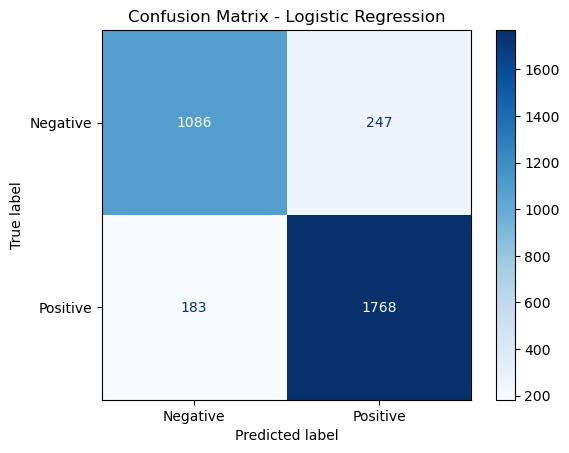

In [83]:

y_pred_lr = lr_predictions  # No .predict() needed

# Define numeric labels that exist in your dataset
labels = [0, 1]

# Optional: Map numeric labels to human-readable names
display_labels = ["Negative", "Positive"]

# Compute confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=labels)

# Display confusion matrix
ConfusionMatrixDisplay(cm_lr, display_labels=display_labels).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

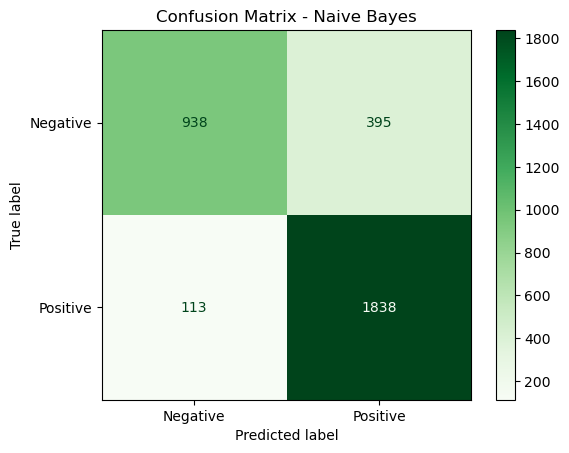

In [91]:

y_pred_nb = nb_predictions  # replace with your Naive Bayes predictions

# Define numeric labels present in your dataset
labels = [0, 1]

# Optional: map numeric labels to human-readable names
display_labels = ["Negative", "Positive"]

# Compute confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=labels)

# Display confusion matrix
ConfusionMatrixDisplay(cm_nb, display_labels=display_labels).plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [99]:
from sklearn.metrics import precision_recall_curve, average_precision_score

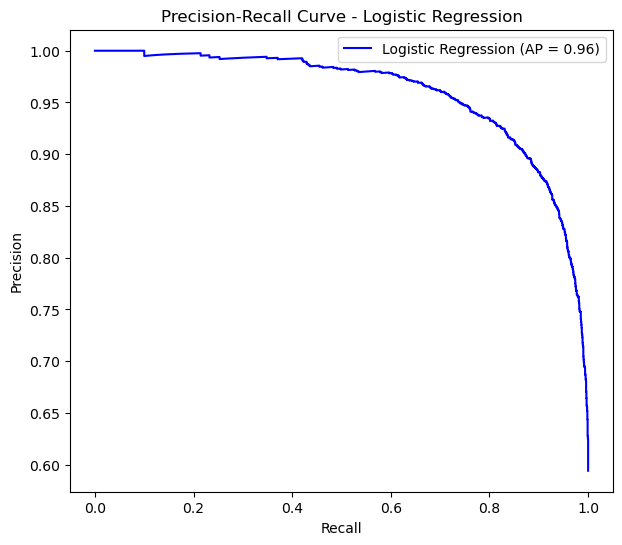

In [105]:
X_test_vect = tfidf.transform(X_test)

# Predict probabilities
y_prob_lr = lr_model.predict_proba(X_test_vect)[:, 1]

# Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_lr)
ap_score = average_precision_score(y_test, y_prob_lr)

# Plot
plt.figure(figsize=(7,6))
plt.plot(recall, precision, color='blue', label=f'Logistic Regression (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend()
plt.show()

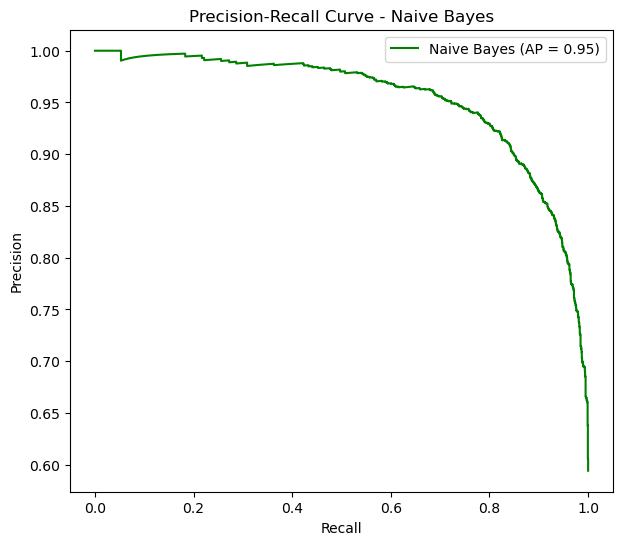

In [107]:
# Step 1: Transform the test text using the same TF-IDF vectorizer used for training
X_test_vect = tfidf.transform(X_test)

# Step 2: Predict probabilities for the positive class
# nb_model = your trained Naive Bayes model (MultinomialNB or similar)
y_prob_nb = nb_model.predict_proba(X_test_vect)[:, 1]  # probability of positive class

# Step 3: Compute Precision and Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_nb)

# Step 4: Compute Average Precision (AP) score
ap_score = average_precision_score(y_test, y_prob_nb)

# Step 5: Plot Precision-Recall Curve
plt.figure(figsize=(7,6))
plt.plot(recall, precision, color='green', label=f'Naive Bayes (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Naive Bayes')
plt.legend()
plt.show()

In [109]:
from sklearn.metrics import roc_curve, roc_auc_score

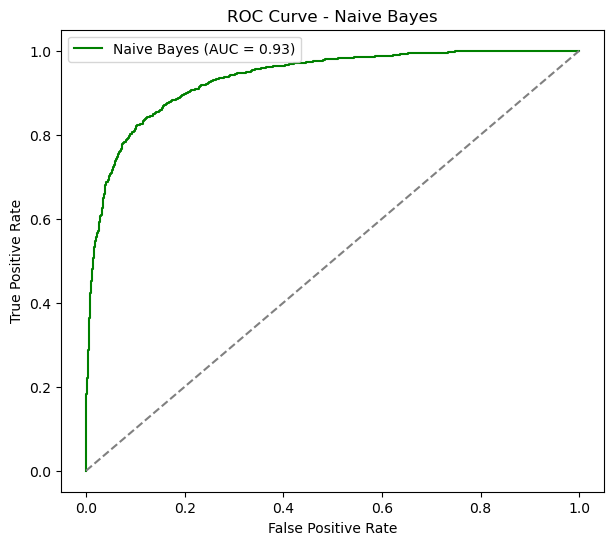

In [111]:
# Step 1: Transform text using the same TF-IDF vectorizer
X_test_vect = tfidf.transform(X_test)

# Step 2: Predict probabilities for positive class
# nb_model = your trained Naive Bayes model
y_prob_nb = nb_model.predict_proba(X_test_vect)[:, 1]  # probability of positive class

# Step 3: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nb)

# Step 4: Compute AUC (Area Under Curve)
auc_score = roc_auc_score(y_test, y_prob_nb)

# Step 5: Plot ROC Curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='green', label=f'Naive Bayes (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()

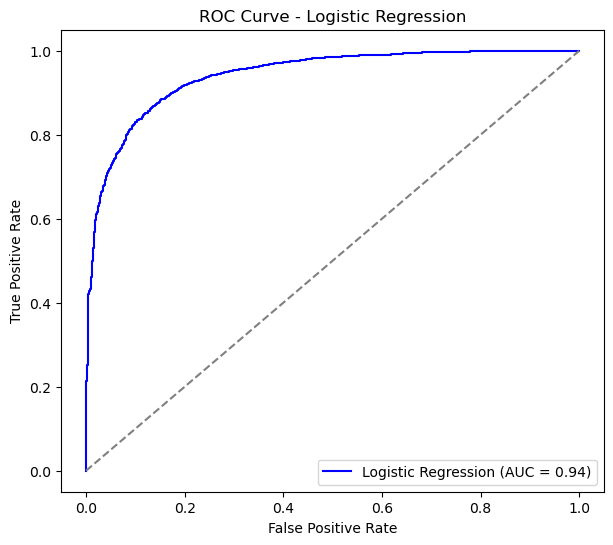

In [138]:
# Step 1: Transform test text using TF-IDF
X_test_vect = tfidf.transform(X_test)

# Step 2: Predict probabilities for positive class
# lr_model = your trained Logistic Regression model
y_prob_lr = lr_model.predict_proba(X_test_vect)[:, 1]  # probability of positive class

# Step 3: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)

# Step 4: Compute AUC (Area Under Curve)
auc_score = roc_auc_score(y_test, y_prob_lr)

# Step 5: Plot ROC Curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

# Print metrics
print("Logistic Regression Performance Metrics:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1-Score : {f1:.2f}")

Logistic Regression Performance Metrics:
Accuracy : 0.87
Precision: 0.88
Recall   : 0.91
F1-Score : 0.89


In [132]:
# Calculate metrics for Naive Bayes
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

# Print metrics
print("Naive Bayes Performance Metrics:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1-Score : {f1:.2f}")

Naive Bayes Performance Metrics:
Accuracy : 0.85
Precision: 0.82
Recall   : 0.94
F1-Score : 0.88


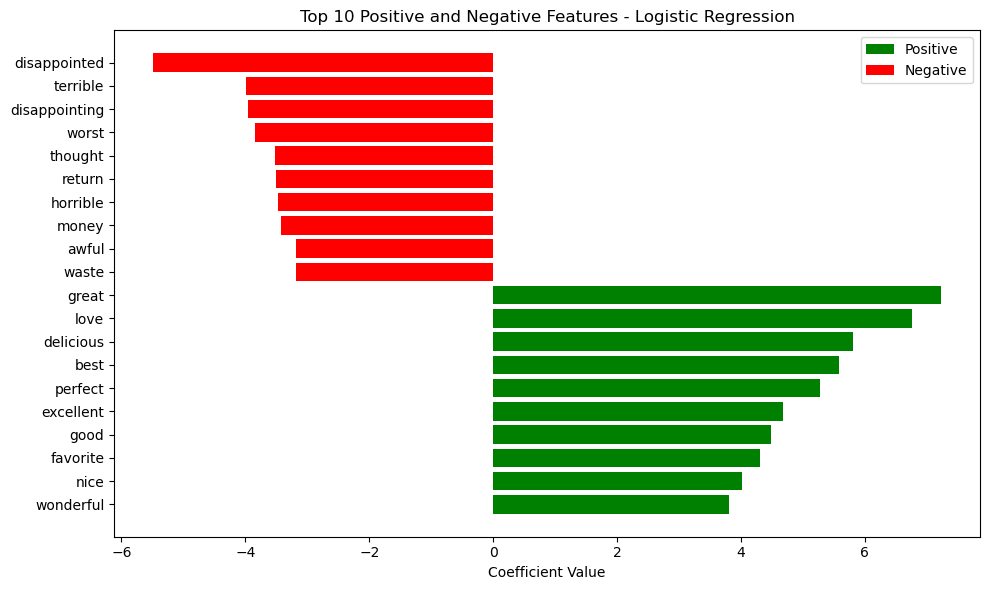

In [140]:

# Get feature names and coefficients
feature_names = tfidf.get_feature_names_out()
coefficients = lr_model.coef_[0]

# Top positive features
top_positive_idx = np.argsort(coefficients)[-10:][::-1]
top_positive_features = [feature_names[i] for i in top_positive_idx]
top_positive_values = [coefficients[i] for i in top_positive_idx]

# Top negative features
top_negative_idx = np.argsort(coefficients)[:10]
top_negative_features = [feature_names[i] for i in top_negative_idx]
top_negative_values = [coefficients[i] for i in top_negative_idx]

# Plot
plt.figure(figsize=(10,6))

# Positive features in green
plt.barh(top_positive_features[::-1], top_positive_values[::-1], color='green', label='Positive')

# Negative features in red
plt.barh(top_negative_features[::-1], top_negative_values[::-1], color='red', label='Negative')

plt.xlabel('Coefficient Value')
plt.title('Top 10 Positive and Negative Features - Logistic Regression')
plt.legend()
plt.tight_layout()
plt.show()

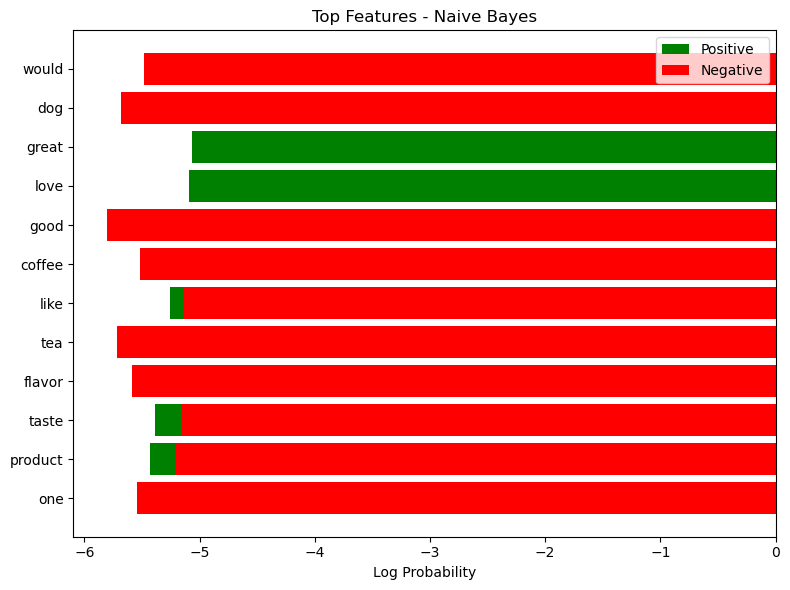

In [142]:
# Feature names from TF-IDF
nb_feature_names = tfidf.get_feature_names_out()

# Feature log probabilities for each class
nb_class0_probs = nb_model.feature_log_prob_[0]  # Negative class
nb_class1_probs = nb_model.feature_log_prob_[1]  # Positive class

# Top 10 Positive features
nb_top_pos_idx = np.argsort(nb_class1_probs)[-10:][::-1]
nb_top_pos_features = [nb_feature_names[i] for i in nb_top_pos_idx]
nb_top_pos_values = [nb_class1_probs[i] for i in nb_top_pos_idx]

# Top 10 Negative features
nb_top_neg_idx = np.argsort(nb_class0_probs)[-10:][::-1]
nb_top_neg_features = [nb_feature_names[i] for i in nb_top_neg_idx]
nb_top_neg_values = [nb_class0_probs[i] for i in nb_top_neg_idx]

# Plot Naive Bayes features
plt.figure(figsize=(8,6))

# Positive features in green
plt.barh(nb_top_pos_features[::-1], nb_top_pos_values[::-1], color='green', label='Positive')

# Negative features in red
plt.barh(nb_top_neg_features[::-1], nb_top_neg_values[::-1], color='red', label='Negative')

plt.xlabel('Log Probability')
plt.title('Top Features - Naive Bayes')
plt.legend()
plt.tight_layout()
plt.show()

In [113]:
# Function to predict sentiment for new input using Logistic Regression
def predict_sentiment(review):
    # Clean the review text
    review = clean_text(review)
    
    # Convert to TF-IDF
    review_tfidf = tfidf.transform([review])
    
    # Predict sentiment
    prediction = lr_model.predict(review_tfidf)[0]
    
    return "Positive" if prediction == 1 else "Negative"

In [115]:
predict_sentiment("This product quality is amazing and delivery was godd fast")

'Positive'

In [117]:
predict_sentiment("It is not good product, bad")

'Negative'

In [119]:
# Function to predict sentiment using Naive Bayes
def predict_sentiment_nb(review):
    # Clean the review text
    review = clean_text(review)
    
    # Convert to TF-IDF
    review_tfidf = tfidf.transform([review])
    
    # Predict sentiment using Naive Bayes
    prediction = nb_model.predict(review_tfidf)[0]
    
    return "Positive" if prediction == 1 else "Negative"

In [121]:
new_review = "This product is amazing and works perfectly!"
print("Logistic Regression Prediction:", predict_sentiment(new_review))
print("Naive Bayes Prediction:", predict_sentiment_nb(new_review))

Logistic Regression Prediction: Positive
Naive Bayes Prediction: Positive


In [123]:
newReview = "This product doesn't suite me "
print("Logistic Regression Prediction:", predict_sentiment(newReview))
print("Naive Bayes Prediction:", predict_sentiment_nb(newReview))

Logistic Regression Prediction: Negative
Naive Bayes Prediction: Positive
